# Flight Price Prediction
---

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#loading the csv datasets to pandas dataframe
df=pd.read_excel(r"C:\Himani\Projects\flight-fare\Flight_Fare.xlsx")

In [4]:
# Split into features and target
X = df.drop('Price', axis=1)  # Features
y = df['Price']               # Target

In [5]:
#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [6]:
#Combine X and y again for full train/test DataFrames

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [7]:
df_train.to_excel(r"C:\Himani\Projects\flight-fare\train.xlsx",index=False)
df_test.to_excel(r"C:\Himani\Projects\flight-fare\test.xlsx",index=False)

In [8]:
train_data = pd.read_excel(r"C:\Himani\Projects\flight-fare\train.xlsx")

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,12/03/2019,Mumbai,Hyderabad,BOM → VNS → DEL → HYD,06:30,16:35,10h 5m,2 stops,No info,23528
1,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,11:30,12:35 10 May,25h 5m,1 stop,In-flight meal not included,12373
2,SpiceJet,24/04/2019,Delhi,Cochin,DEL → MAA → COK,15:45,22:05,6h 20m,1 stop,No info,5583
3,Multiple carriers,21/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,01:35 22 Mar,12h 45m,1 stop,No info,7695
4,Air India,24/06/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 25 Jun,26h,2 stops,No info,11972


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8546 non-null   object
 1   Date_of_Journey  8546 non-null   object
 2   Source           8546 non-null   object
 3   Destination      8546 non-null   object
 4   Route            8545 non-null   object
 5   Dep_Time         8546 non-null   object
 6   Arrival_Time     8546 non-null   object
 7   Duration         8546 non-null   object
 8   Total_Stops      8545 non-null   object
 9   Additional_Info  8546 non-null   object
 10  Price            8546 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 734.6+ KB


In [12]:
train_data["Duration"].value_counts()

Duration
2h 50m     448
1h 30m     308
2h 55m     292
2h 35m     266
2h 45m     253
          ... 
30h 10m      1
39h 5m       1
42h 5m       1
3h 25m       1
6h 50m       1
Name: count, Length: 361, dtype: int64

In [212]:
train_data.describe()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Duration_total_mins
count,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000
mean,0.823054,9075.014511,13.587829,4.708602,12.490462,24.414862,13.354944,24.675834,10.200702,28.375658,640.417788
std,0.674792,4614.244729,8.477487,1.163205,5.741969,18.731652,6.866525,16.487220,8.476786,17.023351,506.695452
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000000,5268.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,175.000000
50%,1.000000,8367.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,510.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,930.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,2820.000000


In [13]:
train_data.dropna(inplace = True)

In [14]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

## EDA

From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date** 

**.dt.month method will extract only month of that date**

In [18]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [19]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [20]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,Jet Airways,12/03/2019,Mumbai,Hyderabad,BOM → VNS → DEL → HYD,06:30,16:35,10h 5m,2 stops,No info,23528,12,3
1,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,11:30,12:35 10 May,25h 5m,1 stop,In-flight meal not included,12373,9,5
2,SpiceJet,24/04/2019,Delhi,Cochin,DEL → MAA → COK,15:45,22:05,6h 20m,1 stop,No info,5583,24,4
3,Multiple carriers,21/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,01:35 22 Mar,12h 45m,1 stop,No info,7695,21,3
4,Air India,24/06/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 25 Jun,26h,2 stops,No info,11972,24,6


In [21]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [22]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_7580\569228883.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
C:\Users\shiva\AppData\Local\Temp\ipykernel_7580\569228883.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute


In [23]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,Jet Airways,Mumbai,Hyderabad,BOM → VNS → DEL → HYD,16:35,10h 5m,2 stops,No info,23528,12,3,6,30
1,Jet Airways,Delhi,Cochin,DEL → BOM → COK,12:35 10 May,25h 5m,1 stop,In-flight meal not included,12373,9,5,11,30
2,SpiceJet,Delhi,Cochin,DEL → MAA → COK,22:05,6h 20m,1 stop,No info,5583,24,4,15,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,01:35 22 Mar,12h 45m,1 stop,No info,7695,21,3,12,50
4,Air India,Delhi,Cochin,DEL → HYD → BOM → COK,19:15 25 Jun,26h,2 stops,No info,11972,24,6,17,15


In [24]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_7580\1117634591.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
C:\Users\shiva\AppData\Local\Temp\ipykernel_7580\1117634591.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute


In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Mumbai,Hyderabad,BOM → VNS → DEL → HYD,10h 5m,2 stops,No info,23528,12,3,6,30,16,35
1,Jet Airways,Delhi,Cochin,DEL → BOM → COK,25h 5m,1 stop,In-flight meal not included,12373,9,5,11,30,12,35
2,SpiceJet,Delhi,Cochin,DEL → MAA → COK,6h 20m,1 stop,No info,5583,24,4,15,45,22,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,12h 45m,1 stop,No info,7695,21,3,12,50,1,35
4,Air India,Delhi,Cochin,DEL → HYD → BOM → COK,26h,2 stops,No info,11972,24,6,17,15,19,15


In [26]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [27]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [28]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Mumbai,Hyderabad,BOM → VNS → DEL → HYD,2 stops,No info,23528,12,3,6,30,16,35,10,5
1,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,12373,9,5,11,30,12,35,25,5
2,SpiceJet,Delhi,Cochin,DEL → MAA → COK,1 stop,No info,5583,24,4,15,45,22,5,6,20
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,7695,21,3,12,50,1,35,12,45
4,Air India,Delhi,Cochin,DEL → HYD → BOM → COK,2 stops,No info,11972,24,6,17,15,19,15,26,0


**Flight Fare Distribution**

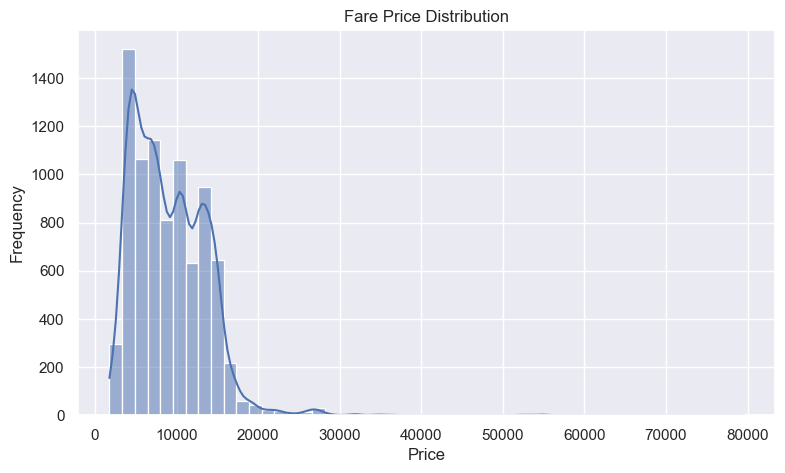

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
sns.histplot(train_data["Price"], bins=50, kde=True)
plt.title("Fare Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


* Right-skewed: Most fares are between ₹2,000–₹20,000, with a few high-priced outliers up to ₹80,000.

* Peak frequency: Majority of flights cost around ₹5,000–₹10,000.

* Long tail: Rare expensive flights create a long tail — outliers

---

## Handling Categorical Data


1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [35]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3058
IndiGo                               1659
Air India                            1400
Multiple carriers                     953
SpiceJet                              654
Vistara                               389
Air Asia                              252
GoAir                                 160
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 1
Trujet                                  1
Name: count, dtype: int64

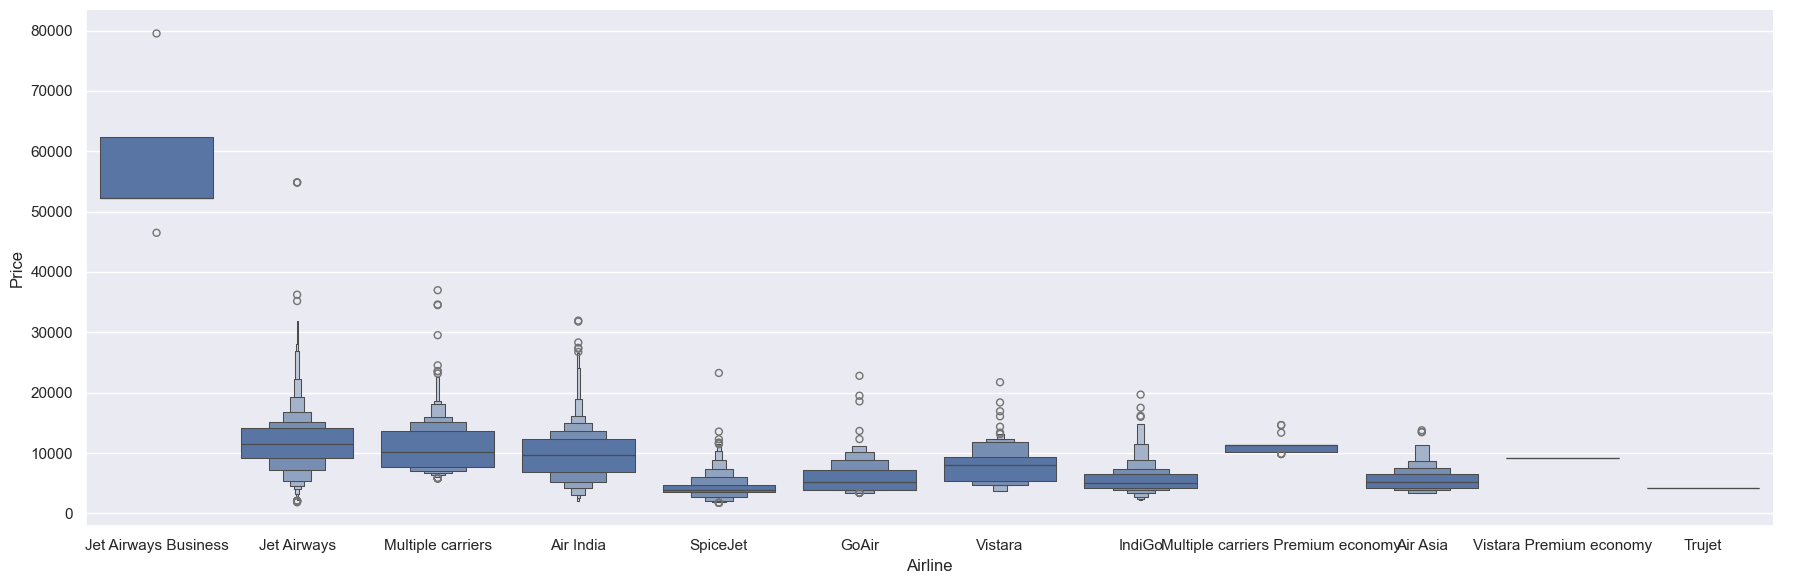

In [36]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

* From graph we can see that Jet Airways Business have the highest Price.
* Apart from the first Airline almost all are having similar median

In [38]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True).astype(int)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [39]:
train_data["Source"].value_counts()

Source
Delhi       3595
Kolkata     2312
Banglore    1777
Mumbai       555
Chennai      306
Name: count, dtype: int64

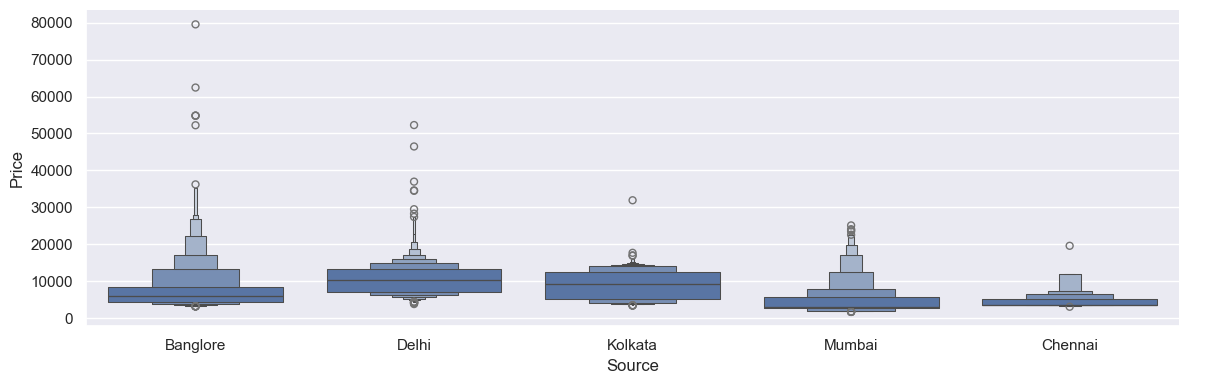

In [40]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

* Some outliers are present in Bangalore.

In [42]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True).astype(int)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [43]:
train_data["Destination"].value_counts()

Destination
Cochin       3595
Banglore     2312
Delhi        1017
New Delhi     760
Hyderabad     555
Kolkata       306
Name: count, dtype: int64

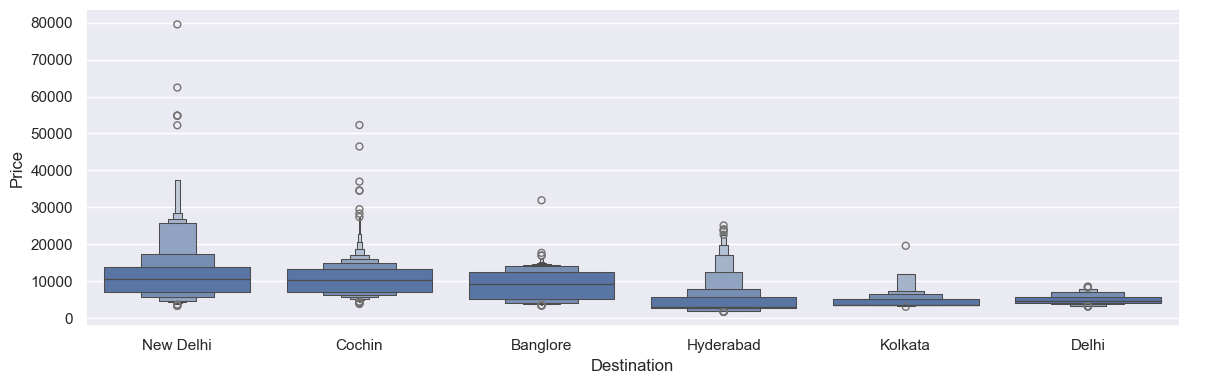

In [44]:
sns.catplot(
    y="Price", 
    x="Destination", 
    data=train_data.sort_values("Price", ascending=False), 
    kind="boxen", 
    height=4, 
    aspect=3
)
plt.show()


Key insights:
* New Delhi has the highest price range and most variability, with many outliers reaching up to ₹80,000.

* Cochin and Bangalore also have relatively high price ranges, though slightly lower than New Delhi.

* Hyderabad, Kolkata, and Delhi (last on x-axis) show lower median prices and narrower distributions, indicating more consistent and cheaper pricing.

* All destinations exhibit outliers, suggesting occasional very high ticket prices.

In [45]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True).astype(int)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [46]:
train_data["Route"]

0       BOM → VNS → DEL → HYD
1             DEL → BOM → COK
2             DEL → MAA → COK
3             DEL → BOM → COK
4       DEL → HYD → BOM → COK
                ...          
8541          DEL → BOM → COK
8542          CCU → BOM → BLR
8543          DEL → BOM → COK
8544                BLR → DEL
8545          DEL → BOM → COK
Name: Route, Length: 8545, dtype: object

In [47]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [48]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      4509
non-stop    2794
2 stops     1203
3 stops       38
4 stops        1
Name: count, dtype: int64

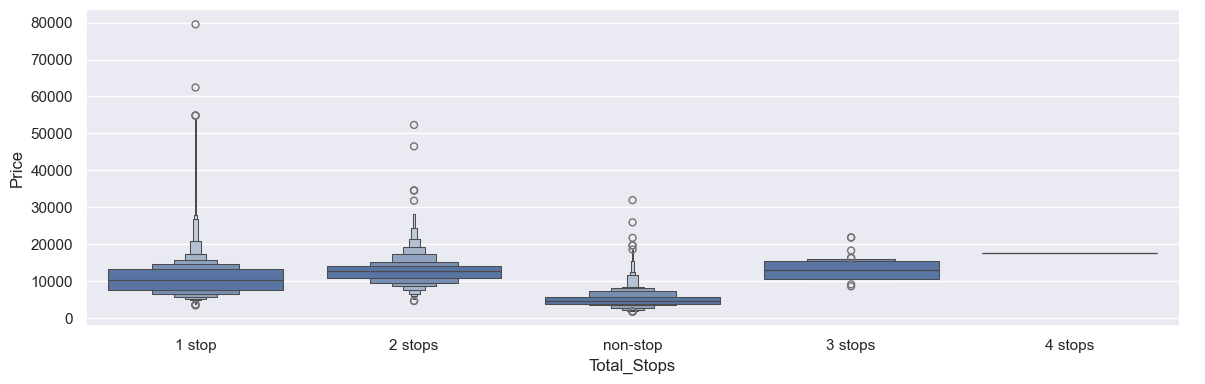

In [49]:
sns.catplot(
    y="Price", 
    x="Total_Stops", 
    data=train_data.sort_values("Price", ascending=False), 
    kind="boxen", 
    height=4, 
    aspect=3
)
plt.show()


The graph shows the distribution of flight prices based on the number of stops:

Non-stop flights have the lowest median price, though a few high-price outliers exist.

1 stop and 2 stops flights are the most common and have similar median prices, but 1 stop flights show a wider price range with more extreme outliers.

3 stops flights have higher median prices and fewer entries.

4 stops have only one value, so no meaningful distribution can be inferred.


**Non-stop flights are generally cheaper on average, while 1-stop flights show the highest price variability.**

In [50]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_7580\1758178131.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [51]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Mumbai,Hyderabad,2,23528,12,3,6,30,16,35,10,5
1,Jet Airways,Delhi,Cochin,1,12373,9,5,11,30,12,35,25,5
2,SpiceJet,Delhi,Cochin,1,5583,24,4,15,45,22,5,6,20
3,Multiple carriers,Delhi,Cochin,1,7695,21,3,12,50,1,35,12,45
4,Air India,Delhi,Cochin,2,11972,24,6,17,15,19,15,26,0


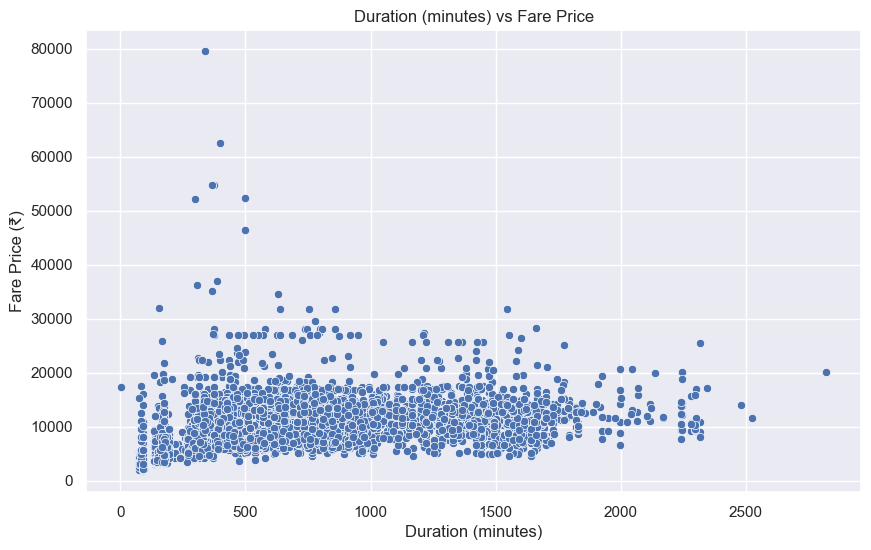

In [52]:
train_data['Duration_total_mins'] = train_data['Duration_hours'] * 60 + train_data['Duration_mins']
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_total_mins', y='Price', data=train_data)
plt.title("Duration (minutes) vs Fare Price")
plt.xlabel("Duration (minutes)")
plt.ylabel("Fare Price (₹)")
plt.show()


**Insights (Duration vs Price)**
* No strong linear relationship — Higher duration doesn't always mean higher fare.

* Most flights are under 1,500 minutes (~25 hrs) and ₹20,000.

* Outliers: Some short-duration flights have extremely high fares (₹50,000–₹80,000).

* Dense cluster: Majority of flights are under 1,000 minutes (~16 hrs) and ₹10,000.

In [54]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [55]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Duration_total_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Mumbai,Hyderabad,2,23528,12,3,6,30,16,35,10,5,605,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,Jet Airways,Delhi,Cochin,1,12373,9,5,11,30,12,35,25,5,1505,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,SpiceJet,Delhi,Cochin,1,5583,24,4,15,45,22,5,6,20,380,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,7695,21,3,12,50,1,35,12,45,765,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air India,Delhi,Cochin,2,11972,24,6,17,15,19,15,26,0,1560,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


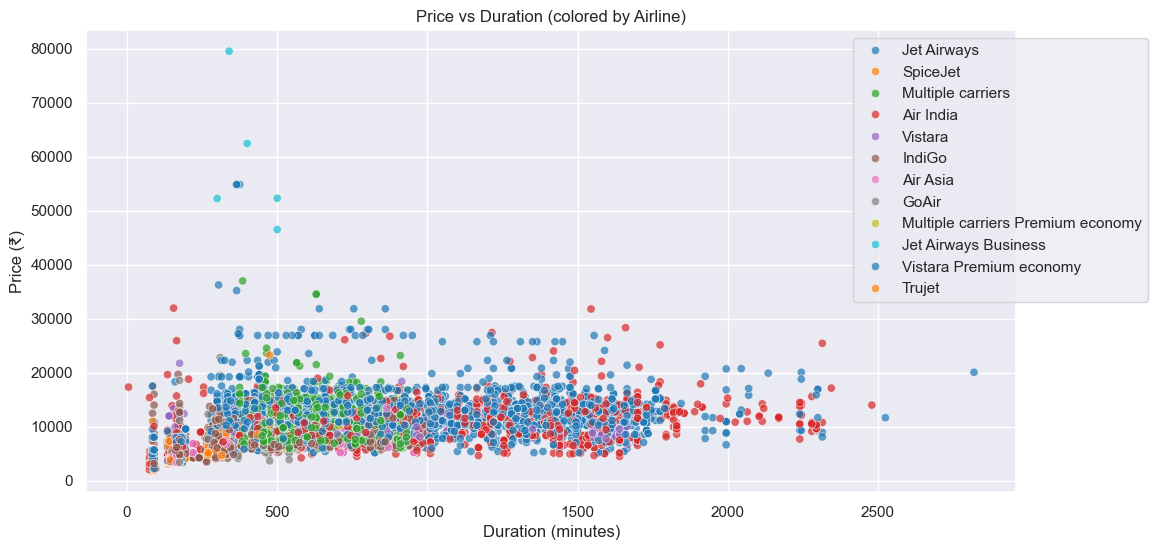

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Duration_total_mins',
    y='Price',
    hue='Airline',
    data=train_data,
    palette='tab10',
    alpha=0.7
)
plt.title("Price vs Duration (colored by Airline)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Price (₹)")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


### Insights from Price vs Duration:(Airlines)

1. **Higher Prices ≠ Longer Duration**: Some short-duration flights (under 500 minutes) have very high prices — likely due to **business or premium economy classes**.
  
2. **Premium Airlines Stand Out**:  
   - **Jet Airways Business** and **Multiple carriers Premium economy** have the **highest fare range**, even for shorter durations.
   - These airlines are clear outliers in terms of price.

3. **Low-cost carriers cluster**:  
   - **SpiceJet, IndiGo, GoAir, and Air Asia** mostly fall in the **low price–short to medium duration** zone — expected for budget airlines.

4. **Wide spread for full-service carriers**:  
   - **Jet Airways, Air India, Vistara** show **moderate to high variability** in price for similar durations — due to varying service levels or stops.

5. **Outliers exist**: Some data points show **very high prices (> ₹60,000)** with **medium duration**, possibly errors or luxury services.


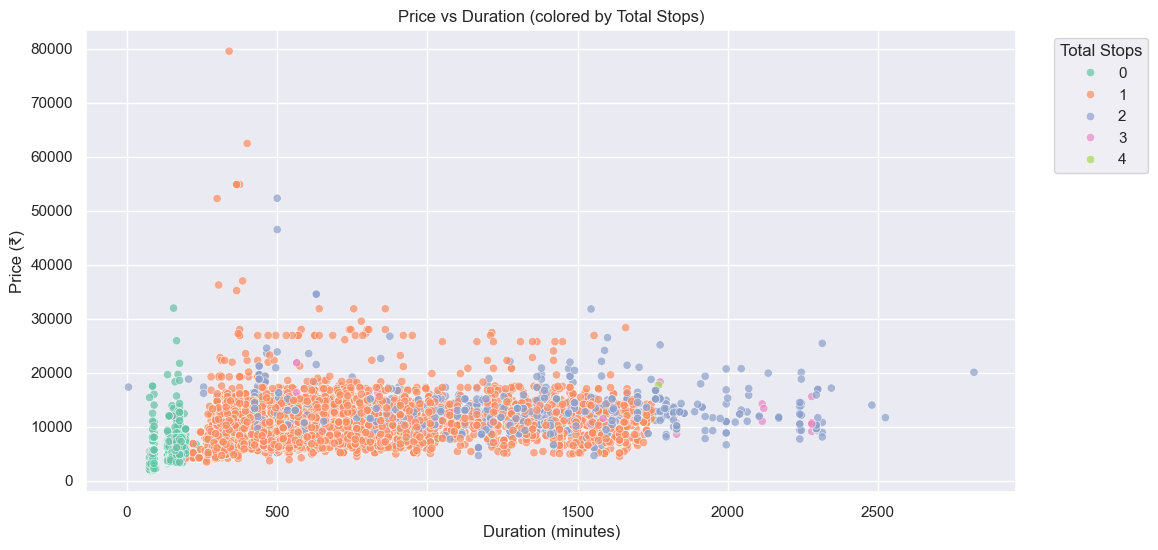

In [58]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Duration_total_mins',
    y='Price',
    hue='Total_Stops',
    data=train_data,
    palette='Set2',
    alpha=0.7
)
plt.title("Price vs Duration (colored by Total Stops)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Price (₹)")
plt.legend(title="Total Stops", loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


### Short Insights from Price vs Duration (Total Stops):

1. **0 Stops (Non-stop flights)**  
   - Mostly have **shorter durations (< 500 minutes)**.  
   - Some are **high-priced**, showing that non-stop flights tend to be premium.

2. **1 Stop dominates**  
   - Majority of flights fall under **1 stop** (orange), covering a wide duration and price range.  
   - Indicates it’s the most common and balanced option in terms of cost and duration.

3. **More Stops → Longer Duration**  
   - Flights with **2, 3, or 4 stops** are mainly on the **longer-duration** side, as expected.  
   - However, they **don’t always offer lower prices**, which may depend on airline or route.

4. **Price Outliers**  
   - Some high-priced tickets occur even with **1 or 2 stops**, possibly due to last-minute bookings, business class, or long-distance international routes.


In [60]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [61]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Duration_total_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2,23528,12,3,6,30,16,35,10,5,605,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,12373,9,5,11,30,12,35,25,5,1505,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,5583,24,4,15,45,22,5,6,20,380,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,1,7695,21,3,12,50,1,35,12,45,765,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2,11972,24,6,17,15,19,15,26,0,1560,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [62]:
data_train.shape

(8545, 31)

---

## Test set

In [65]:
test_data = pd.read_excel(r"C:\Himani\Projects\flight-fare\test.xlsx")

In [66]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,05:45,18:15,12h 30m,1 stop,In-flight meal not included,10844
1,GoAir,3/06/2019,Delhi,Cochin,DEL → BOM → COK,10:35,19:35,9h,1 stop,No info,4959
2,Jet Airways,1/05/2019,Kolkata,Banglore,CCU → BOM → BLR,14:05,19:50,5h 45m,1 stop,No info,14781
3,IndiGo,24/05/2019,Chennai,Kolkata,MAA → CCU,14:45,17:05,2h 20m,non-stop,No info,3858
4,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,22:50,04:25 22 May,5h 35m,1 stop,In-flight meal not included,12898


In [67]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2137 non-null   object
 1   Date_of_Journey  2137 non-null   object
 2   Source           2137 non-null   object
 3   Destination      2137 non-null   object
 4   Route            2137 non-null   object
 5   Dep_Time         2137 non-null   object
 6   Arrival_Time     2137 non-null   object
 7   Duration         2137 non-null   object
 8   Total_Stops      2137 non-null   object
 9   Additional_Info  2137 non-null   object
 10  Price            2137 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 183.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Dest

C:\Users\shiva\AppData\Local\Temp\ipykernel_7580\286465947.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
C:\Users\shiva\AppData\Local\Temp\ipykernel_7580\286465947.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
C:\Users\shiva\AppData\Local\Temp\ipykernel_7580\286465947.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
C:\Users\shiva\AppData\Local

In [68]:
data_test.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,10844,18,5,5,45,18,15,12,30,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,1,4959,3,6,10,35,19,35,9,0,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
2,1,14781,1,5,14,5,19,50,5,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0,3858,24,5,14,45,17,5,2,20,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
4,1,12898,21,5,22,50,4,25,5,35,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False


---

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [71]:
data_train.shape

(8545, 31)

In [72]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [73]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2,12,3,6,30,16,35,10,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,9,5,11,30,12,35,25,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,24,4,15,45,22,5,6,20,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,3,12,50,1,35,12,45,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2,24,6,17,15,19,15,26,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [74]:
y = data_train.iloc[:, 1]
y.head()

0    23528
1    12373
2     5583
3     7695
4    11972
Name: Price, dtype: int64

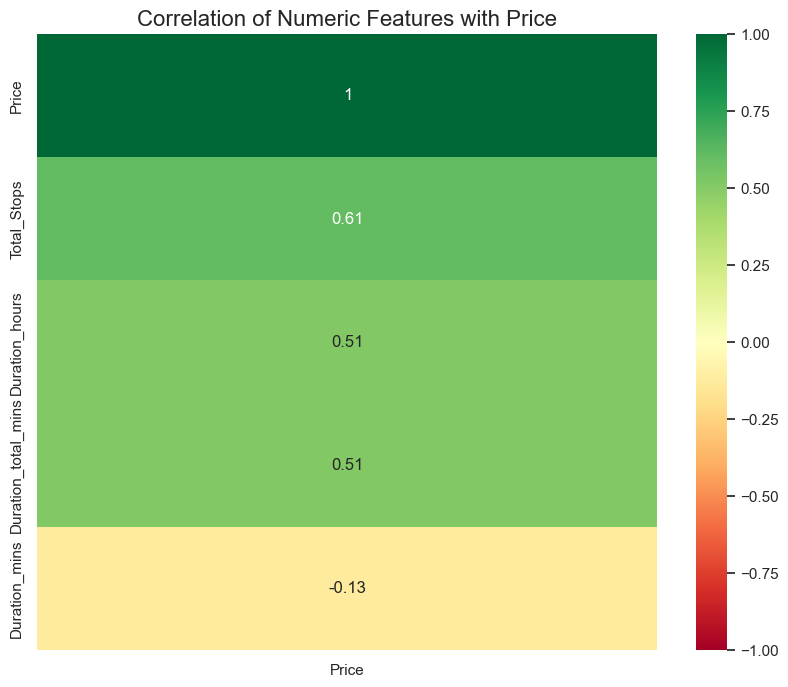

In [75]:
# Finds correlation between Independent and dependent attributes
# Select only numeric columns
numeric_df = train_data.select_dtypes(include=['int64', 'float64'])

# Compute correlation with 'Price'
correlation = numeric_df.corr()

# Plot heatmap for correlation with 'Price'
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation[['Price']].sort_values(by='Price', ascending=False),
    annot=True,
    cmap="RdYlGn",
    vmin=-1, vmax=1
)
plt.title("Correlation of Numeric Features with Price", fontsize=16)
plt.show()

Insights:

---

###  **Correlation of Numeric Features with `Price`:

| Feature          | Correlation with `Price` | Interpretation |
|------------------|---------------------------|----------------|
| **Total_Stops**   | **+0.61**                  | Strong positive correlation — More stops tend to increase the ticket price. |
| **Duration_hours** | **+0.51**                | Moderate positive correlation — Longer flight duration in hours is associated with higher prices. |
| **Duration_mins**  | **−0.13**                | Slight negative correlation — Duration in minutes has a weak and possibly insignificant negative relationship with price. |

---

### **Conclusions**:

1. Total Stops are a strong influencer of Price:
   - A flight with more stops tends to be more expensive. This could be due to higher operational costs, convenience factors, or airline pricing strategies.

2. Flight Duration (in hours) positively affects Price:
   - Longer flight durations generally mean longer distances or less direct routes, often resulting in higher prices.

3. Duration in Minutes is not a strong predictor:
   - The weak negative correlation might suggest that minute-level changes within flights (like small layovers or slight delays) don't meaningfully impact price.

---


In [77]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [78]:
print(selection.feature_importances_)

[2.38544208e-01 1.39511502e-01 5.17138263e-02 2.48825153e-02
 2.31336806e-02 2.72104611e-02 2.07435023e-02 1.07177389e-01
 1.99158731e-02 8.57920715e-03 1.69076817e-03 1.86798009e-02
 1.42191109e-01 7.04580319e-02 1.86382119e-02 9.41189598e-04
 3.30502134e-03 1.89659947e-04 4.31677569e-03 7.22220903e-05
 4.68817382e-04 9.60996303e-03 3.19848627e-03 8.29259375e-03
 1.27468346e-02 1.56429727e-02 6.84578450e-03 5.03672918e-04
 2.07959191e-02]


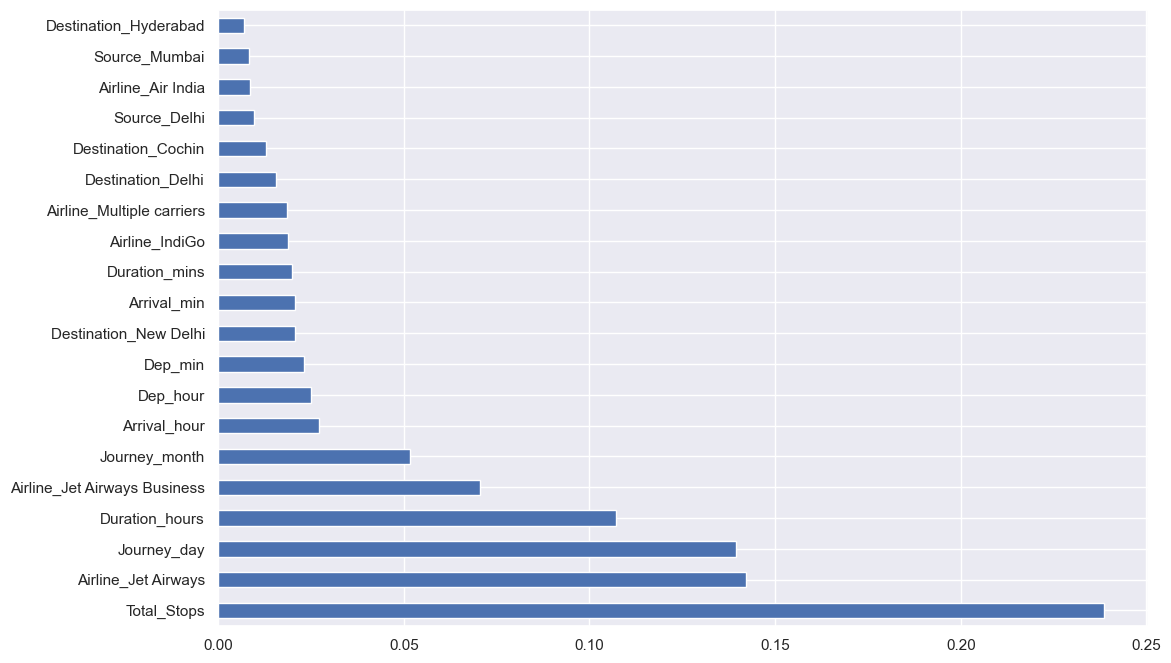

In [79]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


* The highly correlated features will be displayed.

## Fitting model using Random Forest

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [84]:
y_pred = reg_rf.predict(X_test)
y_pred

array([ 8143.92116667,  5364.2255    , 11228.07      , ...,
       12576.1395    , 12332.96966667,  6362.41      ])

In [85]:
reg_rf.score(X_train, y_train)

0.9584819714246383

In [86]:
reg_rf.score(X_test, y_test)

0.7775469661303156

C:\Users\shiva\AppData\Local\Temp\ipykernel_7580\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


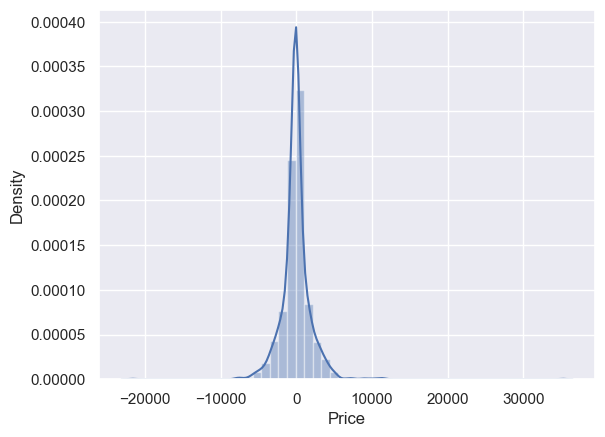

In [87]:
sns.distplot(y_test-y_pred)
plt.show()

* The residuals are normally distributed around zero with minimal skewness, indicating that the model's predictions are unbiased and reasonably accurate, with only a few outliers.

* Residuals are centered around 0 → Model is unbiased.
* Normal bell-shaped curve → Errors are normally distributed, a good sign.
* Most errors are within -10,000 to +10,000 → Acceptable spread.
* Few large outliers
* No heavy tails or skewness → Predictions are generally stable.

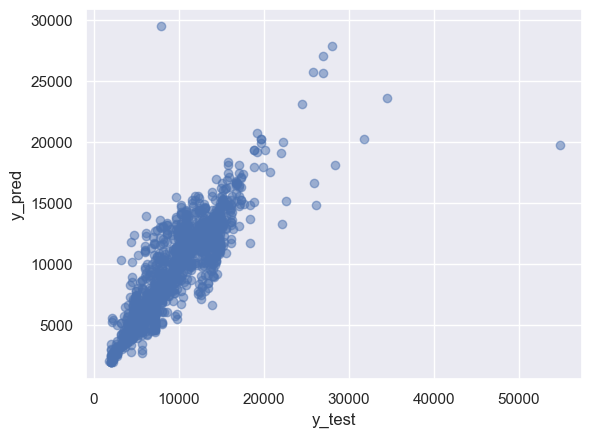

In [89]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

* Most points lie close to a straight line (y = x) → Predictions are strongly correlated with actual values.
* Dense clustering around the lower to mid-value ranges → Model predicts small to medium prices quite well.
* Some deviation at higher y_test values → Model struggles a bit for very high-priced cases (underfitting or less training data there).
* Overall trend is linear → Good model performance.

* The scatter plot indicates a strong positive correlation between actual and predicted values, with slight underperformance observed for very high-value predictions.

In [91]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1188.1189533601923
MSE: 4288730.06641942
RMSE: 2070.9249301747805


In [92]:
# RMSE/(max(DV)-min(DV))-Normalized RMSE
2071.55 / (y.max() - y.min())

0.02664270188931617

In [93]:
normalized_rmse = 2071.55 / (y.max() - y.min())
print(f"Normalized RMSE: {normalized_rmse:.4f}") #Closer to 0 is better


Normalized RMSE: 0.0266


In [94]:
metrics.r2_score(y_test, y_pred) #Closer to 1 indicates good fit model

0.7775469661303156

## Hyperparameter Tuning

In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [98]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [99]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [100]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\shiva\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [101]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [102]:
prediction = rf_random.predict(X_test)

C:\Users\shiva\AppData\Local\Temp\ipykernel_7580\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


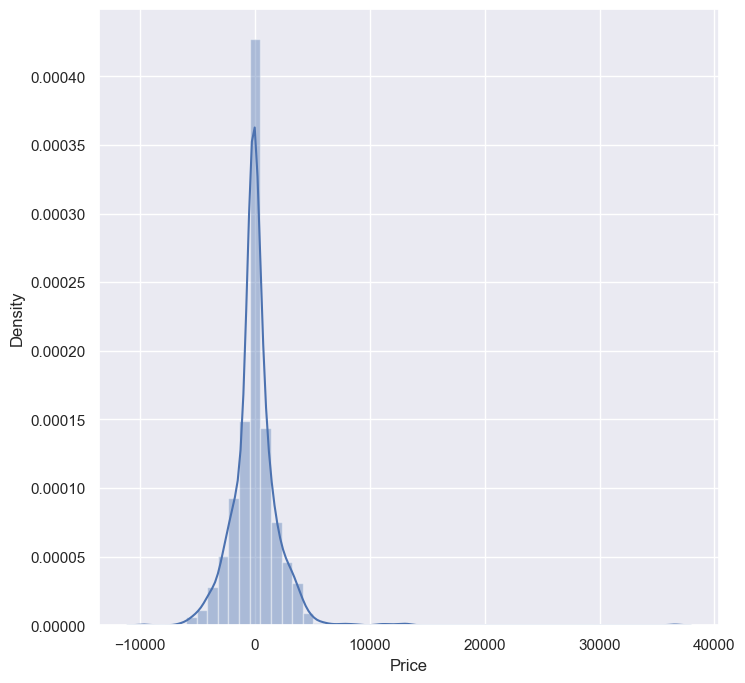

In [103]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

* The residuals are sharply centered and approximately normally distributed around zero, indicating high model accuracy, low bias, and consistent predictive performance.

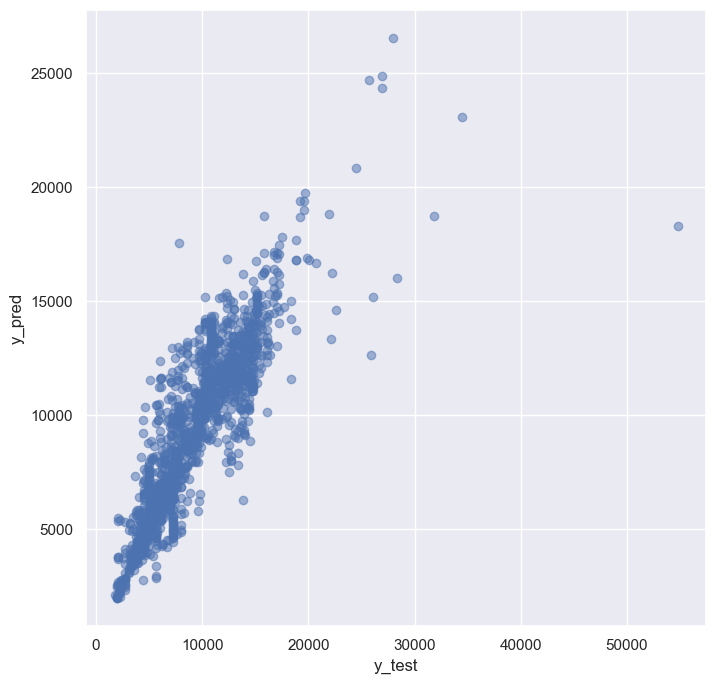

In [105]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

* The model predictions align strongly with actual values, showing good predictive performance with minor errors and few outliers at higher price ranges.


In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1252.72389618212
MSE: 4299427.641596769
RMSE: 2073.5061228741934


Hyperparameter tuning did not lead to significant improvements.
In this case, the untuned model might be preferable given that the MAE is lower (indicating better average accuracy).

## Linear Regression Model

---

In [111]:
from sklearn.linear_model import LinearRegression

selection=LinearRegression()
selection.fit(X_train,y_train)

LinearRegression()

In [112]:
y_predict=selection.predict(X_test)

In [113]:
y_test

4046    12681
1870     5198
2029    11789
453      6093
748      4174
        ...  
3936     8601
3154    12392
6290    10577
5145     9899
8305     6069
Name: Price, Length: 1709, dtype: int64

In [114]:
y_predict

array([12850.09483169,  7419.0745507 , 10320.01761067, ...,
       11764.50932284, 10924.1681089 ,  7481.71436412])

In [115]:
#Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)
#testing model perform on tested data

In [116]:
r2score #if score is nearly 1, its a good model

0.5952972134626275

In [117]:
X_test.shape

(1709, 29)

In [118]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.90)*(40-3)/(40-3-1)
adjusted_r2
#if the difference is high,the training score will be good and testing score will be poor meaning model has hot understood the pattern
#it will perform for tested data and not for new datta
#scenario called as overfitting-perfectly fir for training data-not able to generalize other
#low biased(Traing score-good) and high variance data(tested data-poor)
#underfitting where training score poor (high bias)and testing score(High variance)-not understandable by machine
#for a fit model, testing score and traing data should be high at avriance and low bias(Bias variance data)
#this model is called generalized model

0.8972222222222223

In [119]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

7802370.587597023
2793.2723797719805


In [120]:
print(mean_absolute_error(y_test,y_predict))

1904.9040136773367


In [121]:
y_predict_tr=selection.predict(X_train)

Model Metrics:
1. R² Score: 59.53% of the variance explained. Decent but can be improved.
2. Adjusted R²: 89.72%, indicating a good fit after adjusting for the number of features.
3. MSE, RMSE, and MAE are all quite large, indicating that the model's predictions have significant errors.

<Axes: xlabel='Price'>

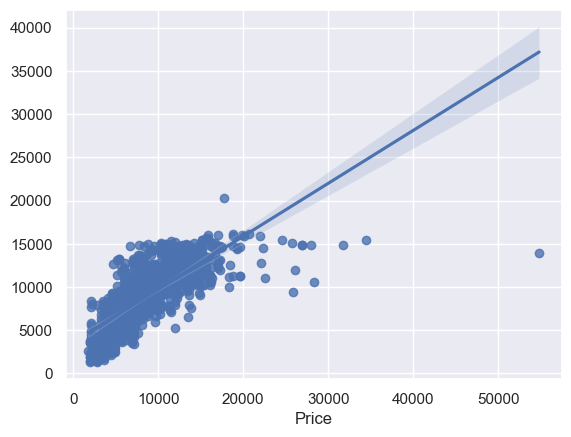

In [123]:
sns.regplot(x=y_test,y=y_predict)

"The model shows strong predictive accuracy for lower price ranges but loses reliability as the price increases."

## XGBoost Model

In [126]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)



In [127]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 1189.00
RMSE: 1975.38
R² Score: 0.80


In [128]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np
# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}
# Initialize XGBoost model
xgb_model = xgb.XGBRegressor()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist,
                                   n_iter=50, scoring='neg_mean_squared_error',
                                   cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)
# Best parameters from the random search
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Negative MSE):", best_score)
# Get the best model
best_model = random_search.best_estimator_

# Evaluate on the test set
y_pred_best = best_model.predict(X_test)

# Calculate MAE, RMSE, and R²
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"MAE: {mae_best}")
print(f"RMSE: {rmse_best}")
print(f"R²: {r2_best}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.6}
Best Score (Negative MSE): -3871920.2
MAE: 1213.33935546875
RMSE: 1953.7166503871538
R²: 0.8020147681236267


### Conclusion:
XGBoost after tuning has provided a slight improvement over the untuned model in terms of RMSE and R². However, the MAE has worsened slightly, suggesting that the model might be focusing more on reducing large errors rather than small ones.

## Save the model to reuse it again

In [131]:
import pickle
# open a file, where you want to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [132]:
#Loading the saved model
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

## Model Recommendation:
Best Overall Model: XGBoost (Tuned)

R² Score: 80.2% (best among all)

RMSE: 1953.72 (lowest error magnitude)

Very slight increase in MAE compared to the untuned model, but overall generalization is better.

**Final Conclusion**:
* Linear Regression is not suitable for this problem due to poor fit and high error.

* Random Forest gave a strong initial result, but tuning did not improve it much.

* XGBoost, even without tuning, outperformed all other models, and tuning led to the best performance overall.

* Tuning XGBoost gave highest accuracy and lowest RMSE, making it the ideal model for deployment.

## Challenges:
1. To prevent data leakage, the whole dataset is separated into train and test datasts and then loaded separately.
2. Data cleaning techniques such as missing values handling, duplicates removal and outlier detection is done for inconsistent data.
3. Feature Engineering: Encoding Categorical Variables, Date-time Features extraction
4. Model comparison
5. Grid Search or Random Search: By systematically testing a range of hyperparameters (e.g., learning rate, max depth of trees, number of estimators in ensemble methods), you can find the optimal settings that prevent overfitting while ensuring that the model is complex enough to capture all relevant patterns.
6. Feature Importance: By evaluating feature importance, you can identify the key drivers of flight prices. 